In [2]:
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
)

### 1) Open and read data from the provided file. 


In [3]:
df = pd.read_csv("data/data.csv", delimiter=';')

### 2) Determine and display the number of records and the number of fields in the loaded dataset.


In [4]:
df.shape

(1599, 12)

In [5]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### 3) Display the first 10 records of the dataset.


In [6]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#### So, the dataset contains records of wine characteristics and their corresponding quality classes.

### 4) Split the dataset into training and test sets.

In [7]:
random_state = 1
df_train, df_test = train_test_split(df, test_size=1/3, random_state=random_state)

### 5) Using the appropriate functions of the scikit-learn library, build a decision tree classification model of depth 5 and train it on the training sample, assuming that in the given dataset the target characteristic is determined by the last column, and all others act as output arguments.

In [8]:
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=random_state)
decision_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=random_state)

x_train = df_train.drop('quality', axis=1)
y_train= df_train['quality']

x_test = df_test.drop('quality', axis=1)
y_test= df_test['quality']

decision_tree_entropy.fit(x_train, y_train)
decision_tree_gini.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 6) Represent the constructed tree graphically using the graphviz library


In [9]:
def create_graph(tree, file_name):
    dot_data = export_graphviz(
        tree, 
        out_file=None, 
        feature_names=x_train.columns, 
        class_names=[str(cl_name) for cl_name in sorted(y_train.unique())],
        filled=True, 
        rounded=True
    )

    graph = graphviz.Source(dot_data)
    graph.render(file_name, format="png", cleanup=True)

In [10]:
create_graph(decision_tree_entropy, "decision_tree_entropy")
create_graph(decision_tree_gini, "decision_tree_gini")

### 7) Calculate the classification metrics of the constructed model for the training and test samples. Present the results of the model on the test sample graphically. Compare the results obtained when applying different splitting criteria: information gain based on entropy or Gini.

In [11]:
def metrics_calc_display(actual, predicted):
    print(f"Accuracy: {accuracy_score(actual, predicted)}")
    print(f"Precision: {precision_score(actual, predicted, zero_division=0, average='weighted')}")
    print(f"Recall: {recall_score(actual, predicted, average='weighted')}")
    print(f"F1-score: {f1_score(actual, predicted, average='weighted')}")
    print(f"MCC: {matthews_corrcoef(actual, predicted)}")
    print(f"Balanced accuracy: {balanced_accuracy_score(actual, predicted)}")

In [12]:
# Training sample
prediction_train_entropy = decision_tree_entropy.predict(x_train)
print("\nMetrics for the training sample (entropy):")
metrics_calc_display(y_train, prediction_train_entropy)

prediction_train_gini = decision_tree_gini.predict(x_train)
print("\nMetrics for the training sample (gini):")
metrics_calc_display(y_train, prediction_train_gini)


Metrics for the training sample (entropy):
Accuracy: 0.6538461538461539
Precision: 0.6412367190780751
Recall: 0.6538461538461539
F1-score: 0.6385241415418103
MCC: 0.45443459036137385
Balanced accuracy: 0.3938947703377942

Metrics for the training sample (gini):
Accuracy: 0.6688555347091932
Precision: 0.6606023650318358
Recall: 0.6688555347091932
F1-score: 0.6460142416155279
MCC: 0.458993563928862
Balanced accuracy: 0.32001707294966975


#### So, the tree with the gini splitting criterion has slightly better performance on most metrics, i.e. the tree predicts larger classes better. However, the value of the balanced accuracy metric is higher for the tree with the entropy splitting criterion, i.e. this tree predicts smaller classes better. We can also see that metrics that take into account class imbalance (MCC, Balanced accuracy) show much worse performance, which indicates poor recognition of small classes.

In [13]:
# Testing sample
print("\nMetrics for the testing sample (entropy):")
prediction_test_entropy = decision_tree_entropy.predict(x_test)
metrics_calc_display(y_test, prediction_test_entropy)

print("\nMetrics for the testing sample (gini):")
prediction_test_gini = decision_tree_gini.predict(x_test)
metrics_calc_display(y_test, prediction_test_gini)


Metrics for the testing sample (entropy):
Accuracy: 0.5647279549718575
Precision: 0.5318479950103163
Recall: 0.5647279549718575
F1-score: 0.5399405686859918
MCC: 0.31359019710983177
Balanced accuracy: 0.28174769501872304

Metrics for the testing sample (gini):
Accuracy: 0.5872420262664165
Precision: 0.5564252672805796
Recall: 0.5872420262664165
F1-score: 0.5639526148476695
MCC: 0.324898524399575
Balanced accuracy: 0.26729066364580384


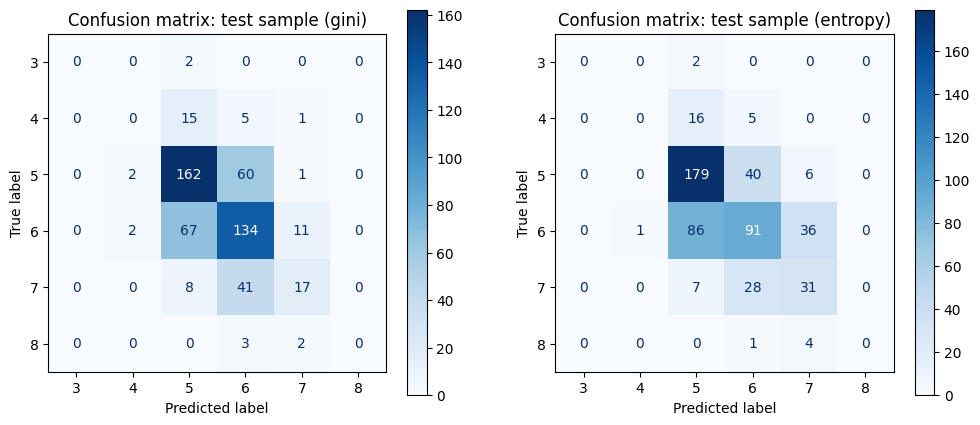

In [14]:
# confusion matrix for the test sample
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_entropy = confusion_matrix(y_test, prediction_test_entropy, labels=decision_tree_entropy.classes_)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=decision_tree_entropy.classes_)
disp_entropy.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title("Confusion matrix: test sample (entropy)")

cm_gini = confusion_matrix(y_test, prediction_test_gini, labels=decision_tree_gini.classes_)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=decision_tree_gini.classes_)
disp_gini.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title("Confusion matrix: test sample (gini)")

plt.show()

### 8) Find out the influence of the depth of the tree and the minimum number of elements in the tree leaf on the classification results. Present the results graphically.


In [15]:
check_depth = {'depth': [], 'f1_score_train': [], 'f1_score_test': []}
for i in range(1, 25):
    decision_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=random_state)
    decision_tree_gini.fit(x_train, y_train)

    prediction_train_gini = decision_tree_gini.predict(x_train)
    accuracy_train = f1_score(y_train, prediction_train_gini, average='weighted')
    
    prediction_test_gini = decision_tree_gini.predict(x_test)
    accuracy_test = f1_score(y_test, prediction_test_gini, average='weighted')

    check_depth['depth'].append(i)
    check_depth['f1_score_train'].append(accuracy_train)
    check_depth['f1_score_test'].append(accuracy_test)

check_depth = pd.DataFrame(check_depth)

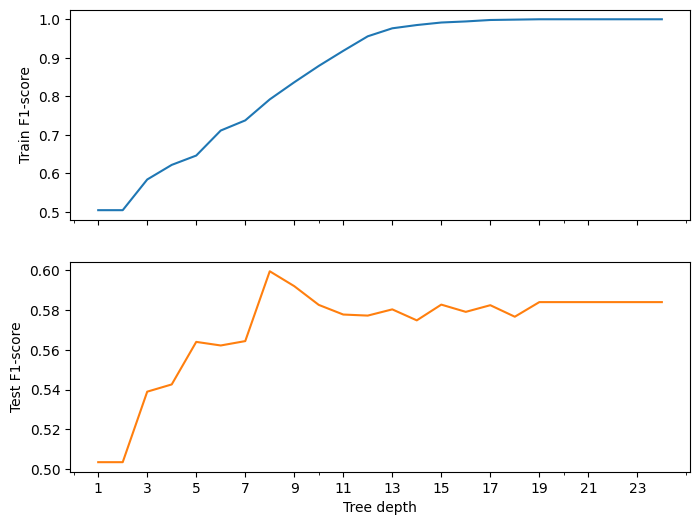

In [16]:
axes = check_depth.plot(figsize=(8, 6), subplots=True, x='depth', layout=(2,1), xticks=range(1, 25, 2), legend=False)
axes[0][0].set_ylabel("Train F1-score")
axes[1][0].set_ylabel("Test F1-score")
axes[1][0].set_xlabel("Tree depth")
plt.show()

#### We see that as the maximum depth of the tree increases, the F1-score for the training sample grows, the model better captures the features of the training data. The F1-score for the test sample first increases until it reaches depth 8, and then decreases, indicating overfitting.

In [17]:
check_leaf = {'min_samples_leaf': [], 'f1_score_train': [], 'f1_score_test': []}

for i in range(1, 31):
    decision_tree_gini = DecisionTreeClassifier(criterion='gini', min_samples_leaf=i, random_state=random_state)
    decision_tree_gini.fit(x_train, y_train)

    prediction_train_gini = decision_tree_gini.predict(x_train)
    accuracy_train = f1_score(y_train, prediction_train_gini, average='weighted')
    
    prediction_test_gini = decision_tree_gini.predict(x_test)
    accuracy_test = f1_score(y_test, prediction_test_gini, average='weighted')

    check_leaf['min_samples_leaf'].append(i)
    check_leaf['f1_score_train'].append(accuracy_train)
    check_leaf['f1_score_test'].append(accuracy_test)

check_leaf = pd.DataFrame(check_leaf)

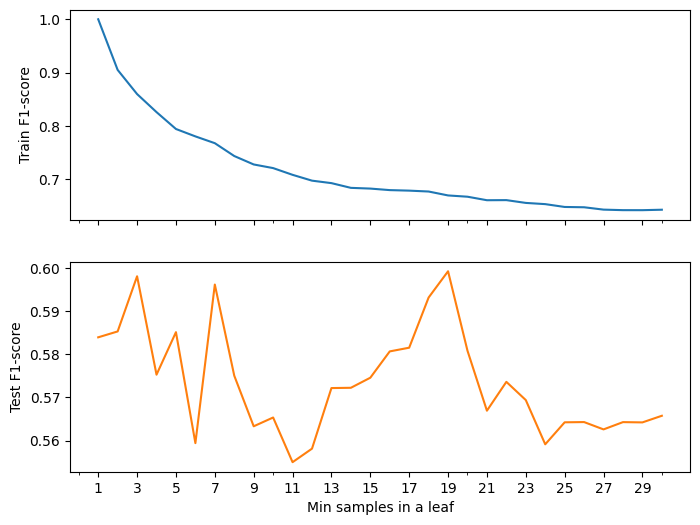

In [18]:
axes = check_leaf.plot(figsize=(8, 6), subplots=True, x='min_samples_leaf', layout=(2,1), xticks=range(1, 31, 2), legend=False)
axes[0][0].set_ylabel("Train F1-score")
axes[1][0].set_ylabel("Test F1-score")
axes[1][0].set_xlabel("Min samples in a leaf")
plt.show()

#### We see that as the minimum number of samples in the leaf increases, the F1-score for the training set drops, as the model generalizes more and more to the data. For the test set, the trend jumps, possibly due to the smaller sample.

#### The best F1-score metrics are achieved with a tree depth of 8 and a minimum number of elements in the leaf - 19.

In [19]:
decision_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=19, random_state=random_state)
decision_tree_gini.fit(x_train, y_train)

print("\nMetrics for the test set (gini, max_depth=8, min_samples_leaf=19):")
prediction_test_gini = decision_tree_gini.predict(x_test)
metrics_calc_display(y_test, prediction_test_gini)
create_graph(decision_tree_gini, "decision_tree_gini_best")


Metrics for the test set (gini, max_depth=8, min_samples_leaf=19):
Accuracy: 0.624765478424015
Precision: 0.5840721308077599
Recall: 0.624765478424015
F1-score: 0.5992970810707375
MCC: 0.39086778916664194
Balanced accuracy: 0.29258409641587213


### 9) Draw a bar chart of the importance of the attributes used for classification (feature_importances_). Explain how you think this importance can be calculated.

In [20]:
importances = decision_tree_gini.feature_importances_
importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

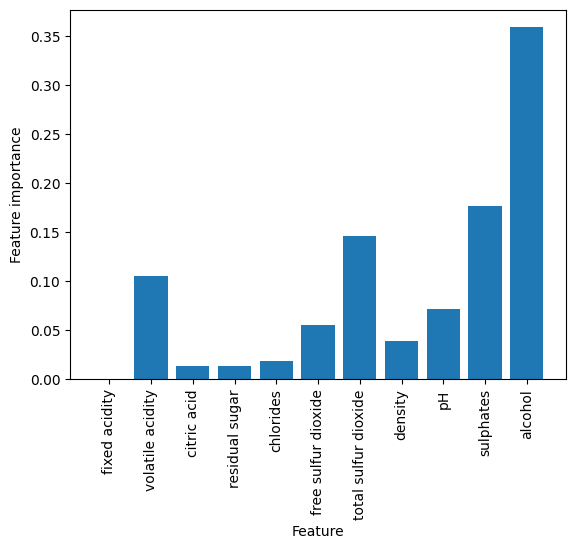

In [21]:
plt.bar(importances['Feature'], importances['Importance'])
plt.ylabel('Feature importance')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.show()

#### How importance is calculated: in the initial state, the system has a certain entropy. After splitting by some attribute, the weighted entropy of the system is calculated (each subset has its own entropy). The information gain is then calculated (initial entropy minus entropy of the system consisting of subsets). So, when splitting by attribute, we get some increase in information and taking into account this increase (the sum of the increases for certain attribute), the importance of the attributes is calculated.